# matplotlib

Matplotlib is the core plotting package in scientific python.  There are others to explore as well (which we'll chat about on slack).

<div class="alert alert-block alert-warning">

There are different interfaces for interacting with matplotlib, an interactive, function-driven (state machine) command-set and an object-oriented version.  We'll focus on the OO interface.
    
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matplotlib concepts

Matplotlib was designed with the following goals (from mpl docs):

* Plots should look great -- publication quality (e.g. antialiased)
* Postscript output for inclusion with TeX documents
* Embeddable in a graphical user interface for application development
* Code should be easy to understand it and extend
* Making plots should be easy

Matplotlib is mostly for 2-d data, but there are some basic 3-d (surface) interfaces.

Volumetric data requires a different approach

### Gallery

Matplotlib has a great gallery on their webpage -- find something there close to what you are trying to do and use it as a starting point:

https://matplotlib.org/stable/gallery/index.html

### Importing

There are several different interfaces for matplotlib (see https://matplotlib.org/3.1.1/faq/index.html)

Basic ideas:

* `matplotlib` is the entire package
* `matplotlib.pyplot` is a module within matplotlib that provides easy access to the core plotting routines
* `pylab` combines pyplot and numpy into a single namespace to give a MatLab like interface.  You should avoid this&mdash;it might be removed in the future.

There are a number of modules that extend its behavior, e.g. `basemap` for plotting on a sphere, `mplot3d` for 3-d surfaces


### Anatomy of a figure

Figures are the highest level object and can include multiple axes
![](anatomy1.png)

(figure from: https://matplotlib.org/stable/gallery/showcase/anatomy.html )


### Backends

Interactive backends: pygtk, wxpython, tkinter, ...

Hardcopy backends: PNG, PDF, PS, SVG, ...



# Basic plotting

plot() is the most basic command.  Here we also see that we can use LaTeX notation for the axes

(0.0, 6.283185307179586)

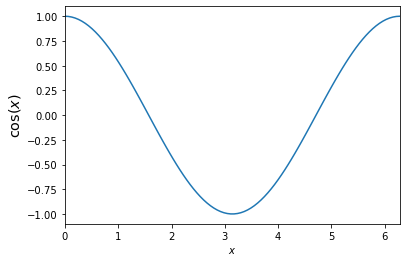

In [2]:
x = np.linspace(0,2.0*np.pi, num=100)
y = np.cos(x)

plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$", fontsize="x-large")
plt.xlim(0, 2.0*np.pi)

Note that when we use the `plot()` command like this, matplotlib automatically creates a figure and an axis for us and it draws the plot on this for us.  This is the _state machine_ interface.  

## OO Interface

(0.0, 6.283185307179586)

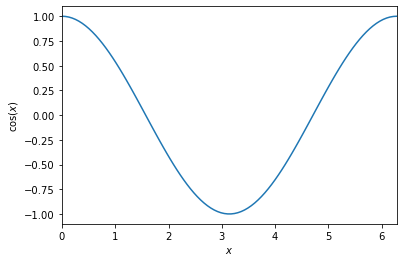

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\cos(x)$")
ax.set_xlim(0, 2*np.pi)

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

We can plot 2 lines on a plot simply by calling plot twice.  Make a plot with both `sin(x)` and `cos(x)` drawn

</div>

we can use symbols instead of lines pretty easily too&mdash;and label them

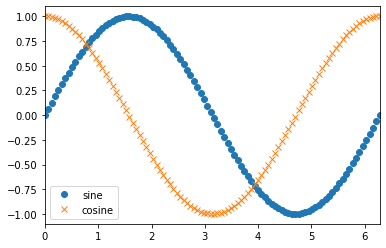

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), "o", label="sine")
ax.plot(x, np.cos(x), "x", label="cosine")
ax.set_xlim(0.0, 2.0*np.pi)
ax.legend()

Here we specified the format using a "format string" (see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

This has the form `'[marker][line][color]'`

most functions take a number of optional named arguments too

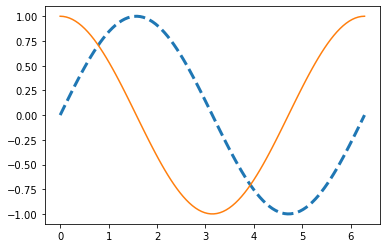

In [5]:
ax.clear()
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
fig

there is a command `setp()` that can also set the properties.  We can get the list of settable properties as

# Multiple axes

There are a wide range of methods for putting multiple axes on a grid.  We'll look at the simplest method.

The `add_subplot()` method we've been using can take 3 numbers: the number of rows, number of columns, and current index

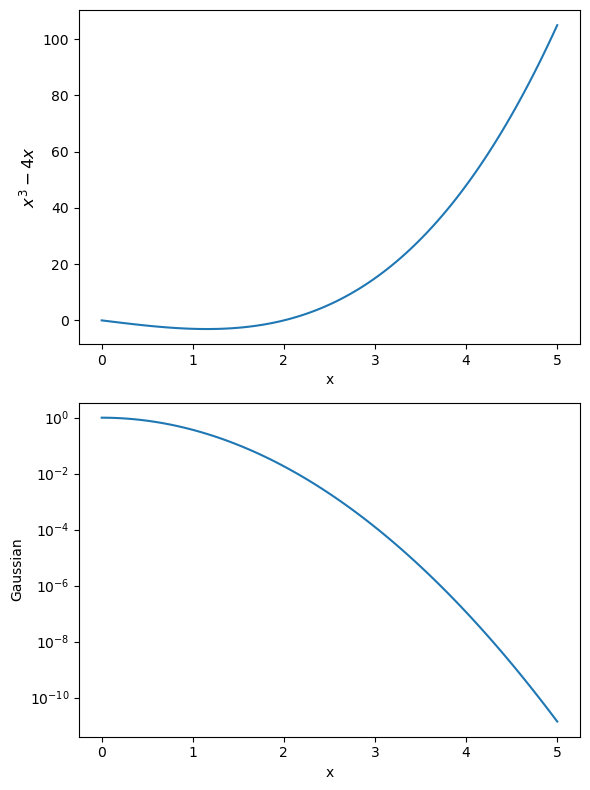

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(211)

x = np.linspace(0,5,100)
ax1.plot(x, x**3 - 4*x)
ax1.set_xlabel("x")
ax1.set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax2 = fig.add_subplot(212)

ax2.plot(x, np.exp(-x**2))
ax2.set_xlabel("x")
ax2.set_ylabel("Gaussian")

# log scale
ax2.set_yscale("log")

# set the figure size
fig.set_size_inches(6, 8)

# tight_layout() makes sure things don't overlap
fig.tight_layout()

# Visualizing 2-d array data

2-d datasets consist of (x, y) pairs and a value associated with that point.  Here we create a 2-d Gaussian, using the `meshgrid()` function to define a rectangular set of points.

In [10]:
def g(x, y):
    return np.exp(-((x-0.5)**2)/0.1**2 - ((y-0.5)**2)/0.2**2)

N = 100

x = np.linspace(0.0,1.0,N)
y = x.copy()

xv, yv = np.meshgrid(x, y)

A "heatmap" style plot assigns colors to the data values.  A lot of work has gone into the latest matplotlib to define a colormap that works good for colorblindness and black-white printing.

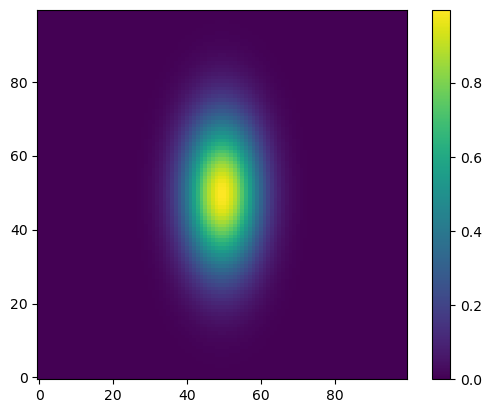

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(g(xv, yv), origin="lower")
fig.colorbar(im, ax=ax)

Sometimes we want to show just contour lines&mdash;like on a topographic map.  The `contour()` function does this for us.

(0.0, 99.0, 0.0, 99.0)

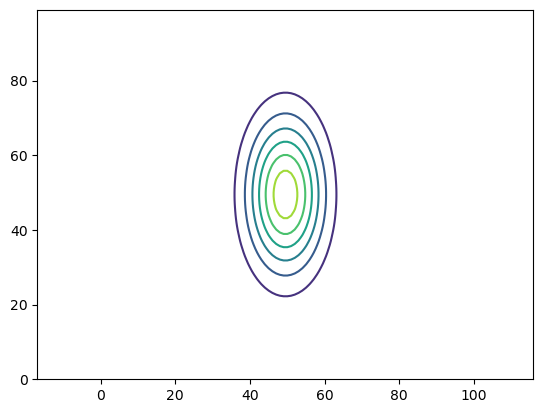

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
contours = ax.contour(g(xv, yv))
ax.axis("equal")   # this adjusts the size of image to make x and y lengths equal

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:
    
Contour plots can label the contours, using the `ax.clabel()` function.
Try adding labels to this contour plot.
</div>